In [60]:
# Import standard libraries 
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
import random 
import numpy.random as rand
from random import randrange
from scipy.stats import bernoulli, binom
import seaborn as sns
from scipy import stats as stat
import pylab 
from tueplots import axes, bundles , figsizes, fonts,fontsizes
from matplotlib.lines import Line2D
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from imblearn.combine import SMOTEENN
from sklearn.inspection import PartialDependenceDisplay
#from pdpbox import pdp, get_dataset, info_plots



In [59]:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.inspection import partial_dependence
from sklearn.utils import resample
from scipy.stats import sem
import numpy as np
from statsmodels.graphics.regressionplots import plot_partregress

In [9]:
nsw = pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/NswLalonde_transformed.csv')
nswre74 = pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/NswDeWab_transformed.csv')
# Quasi data 
nswCps_lalonde =  pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswCps_lalonde.csv')
nswPsid_lalonde = pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswPsid_lalonde.csv')
nswCps_dehWab =   pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswCps_dehWab.csv')
nswPsid_dehWab =  pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswPsid_dehWab.csv')


In [61]:
def dataset(target,features,dataset):

    dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 

    def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        target = dataset[target]
        features = dataset[features]
        return features,target;

    features,target = features_and_targets_function(target,features,dataset)


    return features,target; 

In [62]:

def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;

In [63]:
target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)



/Users/mawuliagamah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mawuliagamah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


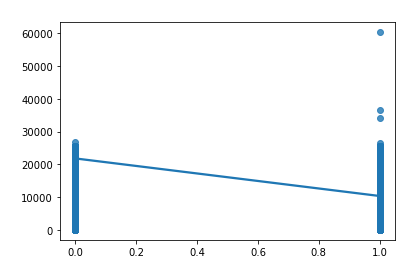

In [67]:
sns.regplot(nswCps_lalonde['black'], nswCps_lalonde['re78'], lowess=True)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title(' ')
plt.show()

/Users/mawuliagamah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mawuliagamah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


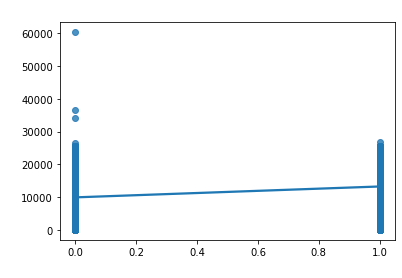

In [68]:
sns.regplot(nswCps_lalonde['hispanic'], nswCps_lalonde['re78'], lowess=True)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title(' ')
plt.show()

In [ ]:
# Function called fit model 
plot = PartialDependenceDisplay.from_estimator(**pdp_params,response_method = "predict_proba")

pdp_params = {"estimator":boostestedTree,
               "features":plot_features,
                "X":features,
                "feature_names":plot_features }

In [70]:
target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)

In [55]:
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)


In [56]:
hyper_parameter_ict = {"objective":"binary:logistic","seed":0,
                       "booster":"dart", "colsample_bytree":0.3,
                         "gamma":0.5, "learning_rate" : 0.05,
                           "max_depth":None, "min_child_weight":2,
                      "subsample":0.5, "nthread":4 }
plot_features = ['treat','age','education*','black','hispanic','married','nodegree','re75']



boostestedTree = XGBClassifier(hyper_parameter_ict).fit(features,target)  # unpack dictionary 

In [107]:
def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;


target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)


def fitandRunModelfunct(hyper_parameter_ict,features,target):

        model = XGBClassifier(**hyper_parameter_ict).fit(features,target)  # unpack dictionary 

        return model


model = fitandRunModelfunct(hyper_parameter_ict,features,target)

def partialdependenceplotfunct(model,features,feature_string, target_string):

        

        x_values = np.linspace(np.min(features[feature_string]), np.max(features[feature_string]))

        pdp_values = []
        for n in x_values:
            X_pdp = features.copy()
            X_pdp[feature_string] = n
            pdp_values.append(np.mean(model.predict(X_pdp)))

        plt.plot(x_values, pdp_values)
        plt.ylabel(target_string)
        plt.xlabel(feature_string)
        plt.title('Partial dependence plot for treated vs boosted tree')
        plt.show()

        return plot

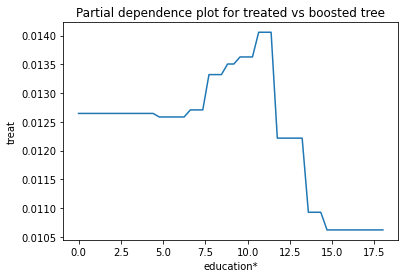

In [109]:
feature_string = "education*"
target_string = "treat"
partialdependenceplotfunct(model,features,feature_string,target_string)

def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;


target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)


boostestedTree = XGBClassifier(**hyper_parameter_ict).fit(features,target)  # unpack dictionary 

x_values = np.linspace(np.min(features['age']), np.max(features['age']))

pdp_values = []
for n in x_values:
  X_pdp = features.copy()
  X_pdp['age'] = n
  pdp_values.append(np.mean(boostestedTree.predict(X_pdp)))

plt.plot(x_values, pdp_values)
plt.ylabel('treated')
plt.xlabel('age')
plt.title('Partial dependence plot for treated vs boosted tree')
plt.show()

pdp_values

# BOOTSTRAP PDP

n_bootstrap = 100

nox_values = np.linspace(np.min(X['NOX']), np.max(X['NOX']))

expected_value_bootstrap_replications = []

for _ in range(n_bootstrap):
    X_boot, y_boot = resample(X, y)
    rf_model_boot = RandomForestRegressor(n_estimators=100).fit(X_boot, y_boot)
    
    bootstrap_model_predictions = []
    for n in nox_values:
        X_pdp = X_boot.copy()
        X_pdp['NOX'] = n
        bootstrap_model_predictions.append(np.mean(rf_model.predict(X_pdp)))
    expected_value_bootstrap_replications.append(bootstrap_model_predictions)
    
expected_value_bootstrap_replications = np.array(expected_value_bootstrap_replications)
for ev in expected_value_bootstrap_replications:
    plt.plot(nox_values, ev, color='blue', alpha=.1)

prediction_se = np.std(expected_value_bootstrap_replications, axis=0)

plt.plot(nox_values, pdp_values, label='Model predictions')
plt.fill_between(nox_values, pdp_values - 3*prediction_se, pdp_values + 3*prediction_se, alpha=.5, label='Bootstrap CI')
plt.legend()
plt.ylabel('Median house price')
plt.xlabel('NOX')
plt.title('Partial dependence plot for NOX vs Price for Random Forest')
plt.show()

plot.figure_.suptitle(
    "Partial dependence plt"
)
plot.figure_.subplots_adjust(hspace=0.3)


plt.rcParams.update({"figure.dpi": 300}) 
plt.rcParams.update(bundles.neurips2022())
plt.rcParams.update(fonts.neurips2022())
plt.rcParams.update(axes.tick_direction( y="in"))
plt.rcParams.update(axes.color(base="black"))
plt.rcParams.update(figsizes.neurips2022(nrows=1, ncols=1))
plt.rcParams.update({'font.size': 18})

In [118]:
# Import tree based model's 
from re import S
from sklearn import tree # classification tree       

boost1_metrics = pd.DataFrame()


xgboost = XGBClassifier(objective= 'binary:logistic',seed=0,nthread=4)


hyper_parameter_ict = {"objective":"binary:logistic","seed":0,
                       "booster":"dart", "colsample_bytree":0.3,
                         "gamma":0.5, "learning_rate" : 0.05,
                           "max_depth":None, "min_child_weight":2,
                      "subsample":0.5, "nthread":4 }


# models 

grid_search_boost1 = XGBClassifier(objective= 'binary:logistic',
                                    seed=0,
                                    booster = 'dart',
                                    colsample_bytree = 0.3,
                                    gamma = 0.5,
                                    learning_rate = 0.05,
                                    max_depth = None,
                                    min_child_weight = 2,
                                    subsample = 0.5,
                                    nthread=4) 
# Function called fit model 
# def fitandRunModelfunct():
#  probabilities = model.predict_proba(dataset.drop('treat', axis=1))

# plotting function
#from sklearn import tree
#import graphviz
#tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
#graphviz.Source(tree_graph)


class explainer:
    # Class attribute
    def __init__(self,model,dataset): # initialise class 
                  #bootstrap true false           
        super(explainer, self).__init__() 
        self.model = model
        self.dataset = dataset

 
    @classmethod
    def partialdependenceplotfunct(pdp,feature_string, target_string):
        x_values = np.linspace(np.min(features[feature_string]), np.max(features[feature_string]))
        pdp_values = []
        for n in x_values:
            X_pdp = features.copy()
            X_pdp[feature_string] = n
            pdp_values.append(np.mean(model.predict(X_pdp)))
        plt.plot(x_values, pdp_values)
        plt.ylabel(target_string)
        plt.xlabel(feature_string)
        plt.title('Partial dependence plot for treated vs boosted tree')
        plt.show()
        plot = pdp(feature_string,target_string)
        return plot
        
        #def organiseDatafunct():  

        #return # dataframe of organised data

        # show tree's 
        #def treeGraph():

        #return plot
    
        #def partialdependenceplotfunct():


          #  return plot 






In [119]:
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)
boost = XGBClassifier(**hyper_parameter_ict).fit(features,target)  # unpack dictionary 

target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)



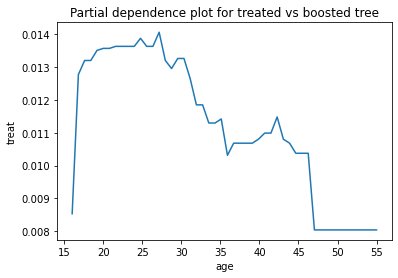

In [120]:
#pdp = explainer(dataset,model,bootstrap,)
pdp = explainer(model,nswCps_lalonde)
pdp.partialdependenceplotfunct("age","treat")

In [ ]:
tree_explainer.explain("data goes here","method")


# this thing is the plot 
plot = tree_explainer.explain(boost,dataset)
# what should it return 



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
tree.DecisionTreeClassifier(random_state=0) # decision tree